# Lab 07-2 linear regression(without min/max)

* linear regression에 대한 설명 (Data에 대한 표준화나 정규화 없이 수행)

### 기본 Library 선언 및 TensorFlow 버전 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)  # for reproducibility

print(tf.__version__)

2.3.0


### 사용할 data

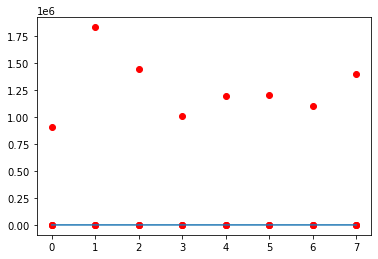

In [4]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

In [22]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

W = tf.Variable(tf.random.normal((4, 1)), dtype = tf.float32)
b = tf.Variable(tf.random.normal((1, )), dtype = tf.float32)

def linearReg_func(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

def loss_func(hypothesis, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)

def grad(features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_func(linearReg_func(features),labels)
    return tape.gradient(loss_value, [W,b]), loss_value

EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        hypo_value = linearReg_func(features)
        grads, loss_value = grad(features, labels)        
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}, Prediction: {}".format(step, loss_value, hypo_value)) 

Iter: 0, Loss: 57923944448.0000, Prediction: [[170323.48]
 [342912.97]
 [269750.4 ]
 [189083.77]
 [222851.72]
 [224731.53]
 [205970.39]
 [262253.9 ]]
Iter: 10, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 20, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 30, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 40, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 50, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 60, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 70, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 80, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 90, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 100, Loss: nan, Prediction: [[nan]